<a href="https://colab.research.google.com/github/mrizal0/Credit-Prediction/blob/main/Task_ID_X_Partners_Data_Scientist_%3CM_Rizal%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm
import lifelines
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 13.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4396e688ba1ffc5e6905671256e455e9642789c35458067d906f32183834e041
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Jangan Ganggu/loan_data_2007_2014.csv')

<ipython-input-7-b5f0602a6a5d>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('/content/drive/MyDrive/Jangan Ganggu/loan_data_2007_2014.csv')


# Business understanding

**Context:** Dataset ini berisi informasi tentang pinjaman yang diajukan oleh anggota, termasuk detail peminjam, jumlah pinjaman, suku bunga, angsuran, pendapatan, dan berbagai metrik kredit.

**Objective:**Tujuan utama analisis ini adalah untuk memahami faktor-faktor yang mempengaruhi performa pinjaman, mengidentifikasi pola dan tren dalam data, dan memberikan rekomendasi untuk pengelolaan risiko dan pengambilan keputusan bisnis yang lebih baik.

dalam dataset terdapat : 466285 baris dan 75 kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.shape

(466285, 75)

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [ ]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Univariate Analysis

**Loan Amount (loan_amnt):**

Jumlah pinjaman rata-rata adalah sekitar **14,317 dollar** , dengan standar deviasi sekitar **8,286 dollar**
Pinjaman terkecil adalah **500 dollar** dan pinjaman terbesar adalah **35,000. dollar**
Kuartil pertama (25%) adalah **8,000 dollar**, kuartil kedua (median) adalah **12,000,dollar** dan kuartil ketiga (75%) adalah **20,000. dollar**

**Funded Amount (funded_amnt):**

Jumlah pendanaan rata-rata hampir sama dengan jumlah pinjaman rata-rata, yaitu sekitar **14,292. dollar**
Seperti loan amount, funded amount juga memiliki rentang yang besar, dari **500** dollar hingga **35,000. dollar**

**Funded Amount Invested (funded_amnt_inv):**

Rata-rata dana yang diinvestasikan sedikit lebih rendah dari funded amount dan loan amount, sekitar **14,222. dollar**
Investasi terkecil adalah **0 dollar** dan yang terbesar adalah **35,000. dollar**

In [ ]:
numeric_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment']
numeric_stats = df[numeric_cols].describe()
print("Statistik Deskriptif untuk Kolom Numerik:")
print(numeric_stats)

Statistik Deskriptif untuk Kolom Numerik:
           loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  466285.000000  466285.000000    466285.000000  466285.000000   
mean    14317.277577   14291.801044     14222.329888      13.829236   
std      8286.509164    8274.371300      8297.637788       4.357587   
min       500.000000     500.000000         0.000000       5.420000   
25%      8000.000000    8000.000000      8000.000000      10.990000   
50%     12000.000000   12000.000000     12000.000000      13.660000   
75%     20000.000000   20000.000000     19950.000000      16.490000   
max     35000.000000   35000.000000     35000.000000      26.060000   

         installment  
count  466285.000000  
mean      432.061201  
std       243.485550  
min        15.670000  
25%       256.690000  
50%       379.890000  
75%       566.580000  
max      1409.990000  


In [ ]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


**Distribusi Suku Bunga:** Sebagian besar suku bunga terkonsentrasi pada range yang lebih rendah, dengan frekuensi tertinggi berada di sekitar 10-15%.  Hal ini menunjukkan bahwa sebagian besar pinjaman atau produk keuangan yang terwakili dalam data memiliki suku bunga dalam kisaran ini.

**Distribusi Ekor (Tail Distribution):**  Grafik ini juga menunjukkan adanya distribusi ekor di kedua sisi.  Artinya, ada jumlah pinjaman yang lebih sedikit dengan suku bunga yang jauh lebih rendah atau lebih tinggi dari range puncak. Ini mungkin mewakili pinjaman khusus atau produk dengan profil risiko atau target pasar yang unik.

**Interpretasi:**  Distribusi keseluruhan menunjukkan bahwa suku bunga terkonsentrasi di sekitar nilai tengah, dengan konsentrasi yang nyata di kisaran 10-15%.  Ini bisa menunjukkan lingkungan suku bunga yang relatif stabil dan dapat diprediksi untuk pinjaman atau produk keuangan yang terwakili dalam data.

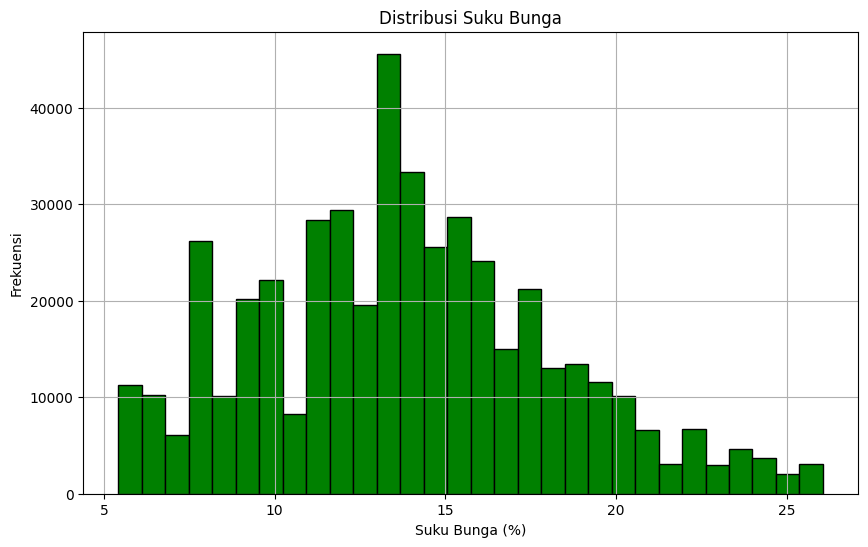

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=30, color='green', edgecolor='black')
plt.title('Distribusi Suku Bunga')
plt.xlabel('Suku Bunga (%)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Distribusi Jumlah Pinjaman:**
Variabilitas: Lebar kotak (box) menunjukkan variabilitas jumlah pinjaman dalam setiap kategori rasio utang. Semakin lebar kotak, semakin beragam jumlah pinjamannya. Dalam diagram ini, kotak untuk rasio utang < 10% dan 10% - 20% relatif lebar, menunjukkan bahwa jumlah pinjaman dalam kategori ini cukup beragam.

**Median:** Garis di tengah setiap kotak mewakili median jumlah pinjaman untuk setiap rasio utang. Median menunjukkan nilai di mana setengah dari pinjaman lebih besar dari nilai tersebut dan setengah lainnya lebih kecil. Dalam diagram ini, median jumlah pinjaman secara umum meningkat seiring dengan meningkatnya rasio utang. Hal ini menunjukkan bahwa peminjam dengan rasio utang yang lebih tinggi cenderung meminjam lebih banyak uang.

**Outlier:**
Titik-titik di luar kotak (box) mewakili outlier, yaitu data yang jauh dari median. Outlier dapat menunjukkan kasus-kasus khusus di mana jumlah pinjaman jauh berbeda dari nilai tipikal untuk rasio utang tersebut. Dalam diagram ini, terdapat beberapa outlier di kategori rasio utang < 10% dan 10% - 20%. Hal ini menunjukkan bahwa ada beberapa peminjam dengan rasio utang rendah yang meminjam jumlah uang yang cukup besar.

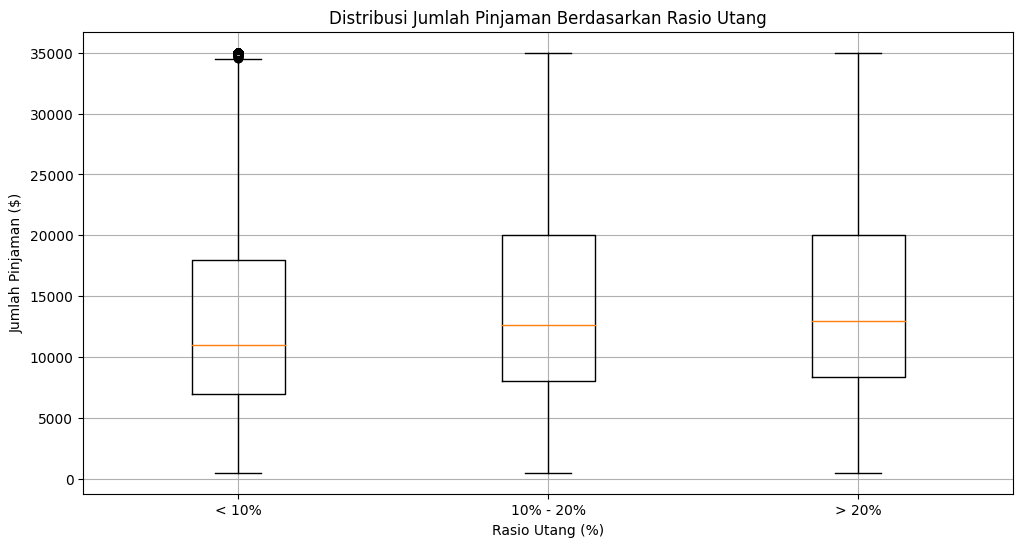

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['dti'] < 10]['loan_amnt'], df[(df['dti'] >= 10) & (df['dti'] < 20)]['loan_amnt'], df[df['dti'] >= 20]['loan_amnt']],
            labels=['< 10%', '10% - 20%', '> 20%'])
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Rasio Utang')
plt.xlabel('Rasio Utang (%)')
plt.ylabel('Jumlah Pinjaman ($)')
plt.grid(True)
plt.show()

**Kredit Lancar (Current):** Porsi terbesar dari pinjaman (sekitar 62%) sedang berjalan lancar (current). Ini menunjukkan kinerja kredit yang baik secara keseluruhan.

**Kredit Macet (Charged Off):**Jumlah pinjaman macet (charged off) cukup signifikan (sekitar 12%). Ini perlu menjadi perhatian karena bisa berdampak pada kerugian lembaga keuangan.

**Pinjaman Terlambat (Late):** Terdapat pinjaman yang terlambat (terlambat 16-30 hari dan 31-120 hari) sekitar 8% dari total pinjaman. Ini perlu dipantau untuk mencegah potensi kredit macet.

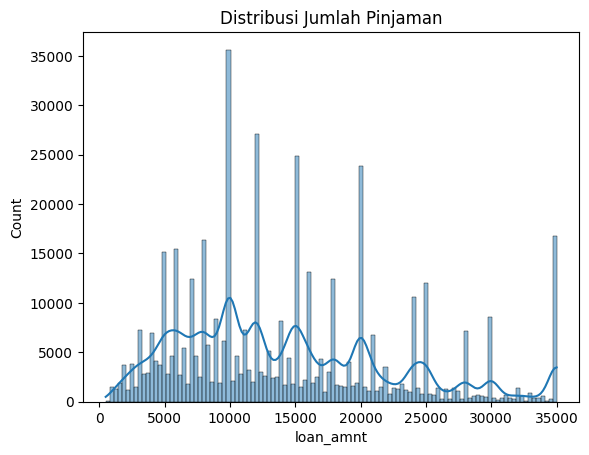

In [ ]:
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Distribusi Jumlah Pinjaman')
plt.show()

**Distribusi Peminjam berdasarkan Grade:**
Grade B dan C adalah yang paling umum, dengan jumlah peminjam sebanyak 136,929 dan 125,293, secara berturut-turut.
Grade G memiliki jumlah peminjam yang paling sedikit, hanya 3,322 orang.

**Tingkat Risiko dan Kualitas Peminjam:**
Grade A dan B cenderung mencerminkan peminjam dengan profil risiko yang lebih rendah dan kualitas kredit yang lebih baik.
Grade G mungkin mencerminkan peminjam dengan profil risiko yang lebih tinggi dan kualitas kredit yang lebih rendah.

**Strategi Pemberian Pinjaman:**
Lembaga keuangan mungkin lebih selektif dalam memberikan pinjaman kepada peminjam dengan grade yang lebih rendah (seperti Grade F dan G) untuk mengurangi risiko gagal bayar.
Pinjaman dengan grade yang lebih tinggi mungkin memiliki suku bunga yang lebih rendah sebagai insentif bagi peminjam dengan profil risiko yang lebih rendah.

grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64


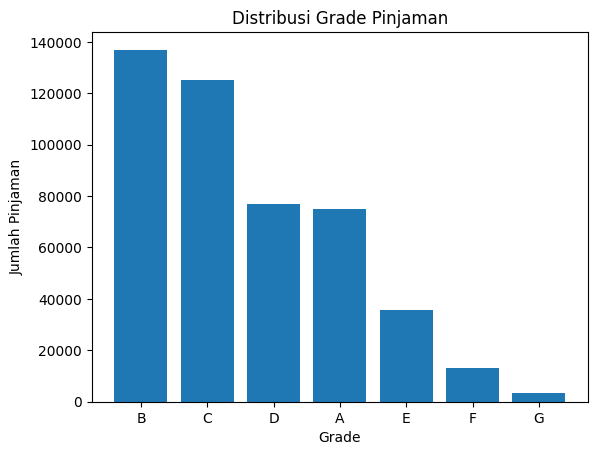

In [ ]:
grade_counts = df['grade'].value_counts()
print(grade_counts)

plt.bar(grade_counts.index, grade_counts.values)
plt.title('Distribusi Grade Pinjaman')
plt.xlabel('Grade')
plt.ylabel('Jumlah Pinjaman')
plt.show()

**Distribusi Jumlah Pinjaman:** Lebar kotak menunjukkan distribusi jumlah pinjaman dalam setiap grade. Kotak yang lebih lebar menunjukkan variasi jumlah pinjaman yang lebih besar untuk grade tersebut. Misalnya, grade B memiliki kotak yang lebih lebar dibandingkan grade C, yang menunjukkan bahwa jumlah pinjaman untuk grade B lebih menyebar.

**Pusat Distribusi:** Garis di tengah setiap kotak mewakili median jumlah pinjaman untuk setiap grade. Median adalah titik di mana setengah dari pinjaman lebih besar dari jumlah tersebut dan setengah lainnya lebih kecil. Dengan membandingkan median dari kotak-kotak tersebut, Anda dapat melihat grade mana yang cenderung memiliki jumlah pinjaman lebih tinggi atau lebih rendah. Misalnya, median untuk grade A tampaknya lebih tinggi daripada median untuk grade C.

**Outlier (Nilai Pencilan):**Titik-titik di luar kotak mewakili outlier. Ini adalah titik data yang berada di luar kisaran tertentu dari median. Outlier dapat menunjukkan kasus luar biasa di mana jumlah pinjaman sangat berbeda dari jumlah pinjaman tipikal untuk grade tersebut.

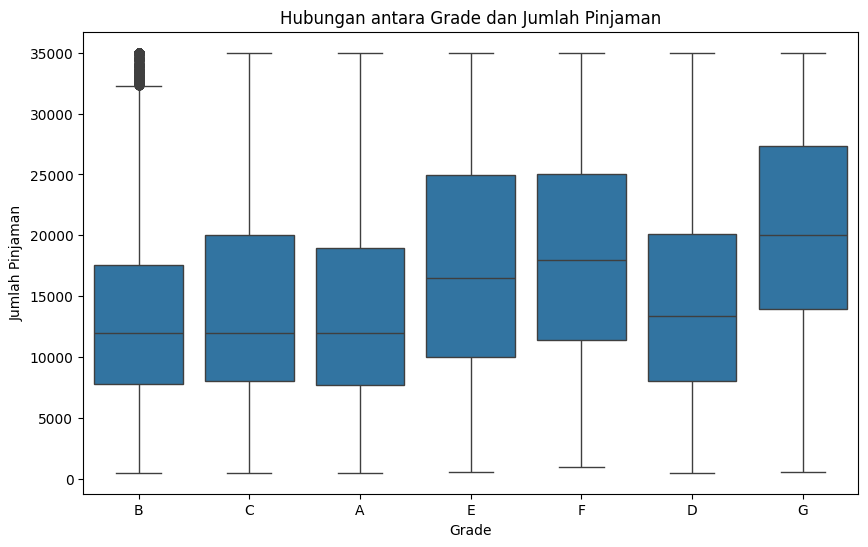

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='loan_amnt', data=df)
plt.title('Hubungan antara Grade dan Jumlah Pinjaman')
plt.xlabel('Grade')
plt.ylabel('Jumlah Pinjaman')
plt.show()

**Kredit Lancar (Current):** Ini adalah kategori terbesar (224.226) yang menunjukkan kredit yang sedang berjalan sesuai dengan perjanjian.

**Lunas (Fully Paid):** Jumlah nasabah yang telah melunasi kreditnya cukup tinggi (184.739), ini indikasi yang positif.

**Macet (Charged Off):** Jumlah kredit macet (42.475) perlu menjadi perhatian. Ini menandakan adanya resiko kredit yang perlu dipertimbangkan.

**Terlambat (Late):** Ada keterlambatan pembayaran kredit pada beberapa nasabah (terlambat 16-30 hari: 1.218 dan terlambat 31-120 hari: 6.900). Ini perlu dipantau untuk mencegah potensi kredit macet.

**Grace Period:** Sedikit nasabah (3.146) sedang dalam masa tenggang pembayaran.

**Tidak Memenuhi Kebijakan Kredit:**
Ada yang tidak lolos(review/approval process) kredit meski berstatus lunas (1.988) dan macet (761). Ini bisa jadi karena perubahan kebijakan atau kesalahan klasifikasi sebelumnya.

In [ ]:

default_counts = df['loan_status'].value_counts()
print(default_counts)

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


Berdasarkan gambar ini, kurva survival untuk kredit macet menunjukkan penurunan yang cukup tajam dalam 20 bulan pertama. Ini artinya, sebagian besar kredit macet terjadi dalam jangka waktu 20 bulan pertama.  Setelah 20 bulan, kurvanya terlihat mendatar, yang menunjukkan adanya penurunan jumlah kredit macet setelah periode tersebut.

In [ ]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)

df['event_observed'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

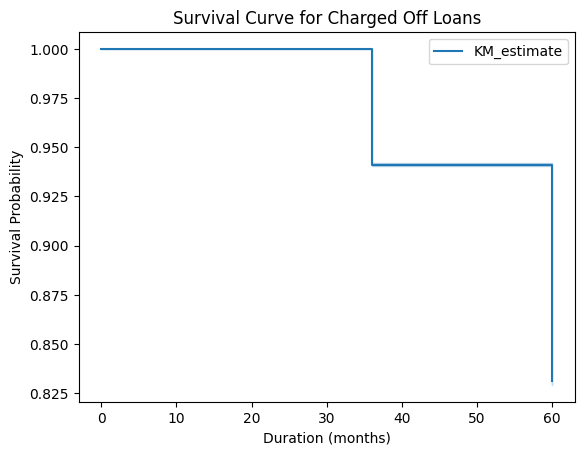

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

durations = df['term']
event_observed = df['event_observed']

kmf.fit(durations, event_observed)

kmf.plot_survival_function()
plt.title('Survival Curve for Charged Off Loans')
plt.xlabel('Duration (months)')
plt.ylabel('Survival Probability')
plt.show()


## Patterns Identified


**Distribusi Suku Bunga:**

Suku bunga terkonsentrasi pada kisaran 10-15%, menunjukkan stabilitas dan prediktabilitas dalam lingkungan suku bunga.
Distribusi ekor menunjukkan adanya pinjaman khusus dengan suku bunga yang sangat tinggi atau rendah.

# Problem understanding

**Key Problems:**

**Identifikasi Faktor Risiko:** Memahami faktor-faktor yang menyebabkan pinjaman menjadi macet (charged off) atau terlambat.
Optimalisasi Suku Bunga: Menentukan rentang suku bunga yang optimal untuk berbagai grade pinjaman untuk meminimalkan risiko gagal bayar.
Strategi Pemberian Pinjaman: Menyusun strategi pemberian pinjaman berdasarkan distribusi grade dan risiko terkait.
Pengelolaan Dana: Mengelola dana secara efisien berdasarkan korelasi antara jumlah pinjaman yang diminta dan didana

# Data Preparation

## Handling Missing Value

In [ ]:
df.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
data_clean = df.dropna(axis=1)

In [ ]:
data_clean

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,1,INDIVIDUAL
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,1,INDIVIDUAL
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,1,INDIVIDUAL
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,1,INDIVIDUAL


## duplicated Values

In [ ]:
data_clean.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Length: 466285, dtype: bool

## One Hot Encoding

In [ ]:
data_clean.dtypes

Unnamed: 0                   int64
id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
revol_bal                    int64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [ ]:
import pandas as pd

cat_vars = ['grade', 'sub_grade','home_ownership', 'verification_status', 'term',
            'issue_d', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']

data_encoded = pd.get_dummies(data_clean[cat_vars], drop_first=False)

data_final = pd.concat([data_clean, data_encoded], axis=1)

data_final.drop(columns=cat_vars, inplace=True)

print(data_final.head())


   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

   int_rate  installment  loan_status  \
0     10.65       162.87   Fully Paid   
1     15.27        59.83  Charged Off   
2     15.96        84.33   Fully Paid   
3     13.49       339.31   Fully Paid   
4     12.69        67.79      Current   

                                                 url  ...  addr_state_UT  \
0  https://www.lendingclub.com/browse/loanDetail....  ...          False   
1  https://www.lendingclub.com/browse/loanDetail....  ...          False   
2  https://www.lendingclub.com/browse/loanDetail....  ..

In [ ]:
data_final

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,loan_status,url,...,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
0,0,1077501,1296599,5000,5000,4975.0,10.65,162.87,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
1,1,1077430,1314167,2500,2500,2500.0,15.27,59.83,Charged Off,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
2,2,1077175,1313524,2400,2400,2400.0,15.96,84.33,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
3,3,1076863,1277178,10000,10000,10000.0,13.49,339.31,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
4,4,1075358,1311748,3000,3000,3000.0,12.69,67.79,Current,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,14.47,432.64,Current,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,False,True,True
466281,466281,9684700,11536848,22000,22000,22000.0,19.97,582.50,Charged Off,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
466282,466282,9584776,11436914,20700,20700,20700.0,16.99,514.34,Current,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,True,False,True
466283,466283,9604874,11457002,2000,2000,2000.0,7.90,62.59,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
data_encoded.dtypes

grade_A                        bool
grade_B                        bool
grade_C                        bool
grade_D                        bool
grade_E                        bool
                               ... 
addr_state_WV                  bool
addr_state_WY                  bool
initial_list_status_f          bool
initial_list_status_w          bool
application_type_INDIVIDUAL    bool
Length: 1101, dtype: object

# Feature Corelation

**Loan amnt - Funded amnt:** Hal ini menunjukkan bahwa jumlah pinjaman yang diminta (loan amnt) memiliki korelasi yang kuat dengan jumlah pinjaman yang didanai (funded amnt). Artinya, semakin besar jumlah pinjaman yang diminta, semakin besar pula kemungkinan pinjaman tersebut didanai.

**Loan amnt - Funded amnt_inv:** Mirip dengan korelasi di atas, terdapat korelasi kuat positif antara jumlah pinjaman yang diminta (loan amnt) dengan jumlah pinjaman yang didanai investor (funded amnt_inv). Hal ini menunjukkan bahwa investor cenderung mendanai pinjaman dengan nominal yang lebih besar.

**Funded amnt - Funded amnt_inv:** Korelasi ini menunjukkan bahwa terdapat hubungan yang kuat antara jumlah pinjaman yang didanai (funded amnt) dengan jumlah pinjaman yang didanai investor (funded amnt_inv). Artinya, semakin banyak pinjaman yang didanai secara keseluruhan, semakin banyak pula pinjaman yang didanai oleh investor.

**Out_prncp - Out_prncp_inv:** Korelasi ini menunjukkan bahwa terdapat hubungan yang kuat antara jumlah pokok pinjaman yang telah dibayarkan (out_prncp) dengan jumlah pokok pinjaman yang telah dibayarkan investor (out_prncp_inv). Artinya, semakin banyak pokok pinjaman yang telah dibayarkan secara keseluruhan, semakin banyak pula pokok pinjaman yang telah dibayarkan oleh investor.

**Total_pymnt - Total_pymnt_inv:** Korelasi ini menunjukkan bahwa terdapat hubungan yang kuat antara total pembayaran pinjaman (total_pymnt) dengan total pembayaran pinjaman investor (total_pymnt_inv). Artinya, semakin banyak total pembayaran pinjaman secara keseluruhan, semakin banyak pula total pembayaran pinjaman yang telah dibayarkan oleh investor.

**Total_rec_prncp - Total_rec_int:** Korelasi ini menunjukkan bahwa terdapat hubungan yang kuat antara total pokok pinjaman yang telah diterima (total_rec_prncp) dengan total bunga pinjaman yang telah diterima (total_rec_int). Artinya, semakin banyak total pokok pinjaman yang telah diterima, semakin banyak pula total bunga pinjaman yang telah diterima.

**Recoveries - Collection_recovery_fee:** Korelasi ini menunjukkan bahwa terdapat hubungan yang kuat antara jumlah dana yang berhasil dipulihkan dari peminjam yang wanprestasi (recoveries) dengan biaya pemulihan kolektif (collection_recovery_fee). Artinya, semakin banyak dana yang berhasil dipulihkan, semakin banyak pula biaya pemulihan kolektif yang dikeluarkan.

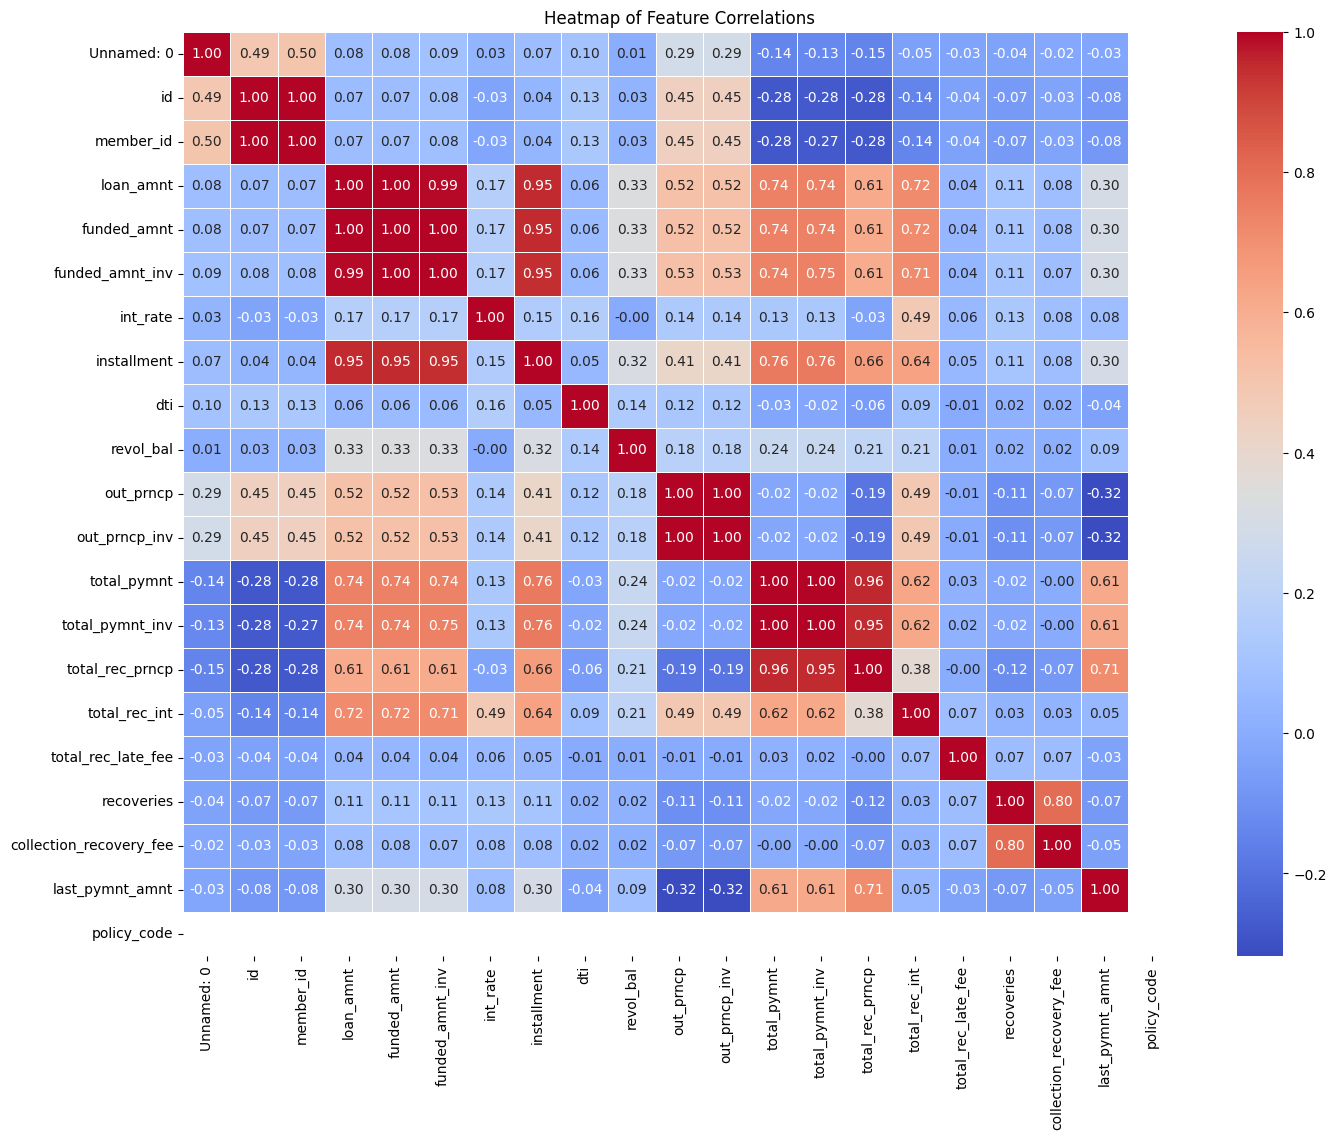

In [ ]:
numeric_data = data_final.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

#Logistic Regression Without Scalling

In [ ]:
dataFIX = data_final.drop('url', axis=1)

## Varible

In [ ]:
dataFIX['loan_status_bin'] = dataFIX['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [ ]:
X = dataFIX.drop(columns=['loan_status', 'loan_status_bin'])
y = dataFIX['loan_status_bin']

In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_Train, y_Train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

**Akurasi Model:**

Akurasi keseluruhan dari model adalah 98.22%. Ini menunjukkan bahwa model sangat baik dalam memprediksi secara keseluruhan apakah pinjaman akan menjadi Charged Off atau tidak.

**Precision, Recall, dan F1-Score:**

**Precision:**
Untuk kelas 0 (tidak Charged Off), precision adalah 0.98, yang berarti 98% dari prediksi untuk pinjaman yang tidak Charged Off benar.
Untuk kelas 1 (Charged Off), precision adalah 0.97, yang berarti 97% dari prediksi untuk pinjaman yang Charged Off benar.

**Recall:**
Untuk kelas 0, recall adalah 1.00, yang berarti model menemukan semua kasus pinjaman yang benar-benar tidak Charged Off.
Untuk kelas 1, recall adalah 0.83, yang berarti model hanya menemukan 83% dari kasus pinjaman yang benar-benar Charged Off.

**F1-Score:**
Untuk kelas 0, F1-score adalah 0.99, menunjukkan keseimbangan yang sangat baik antara precision dan recall.
Untuk kelas 1, F1-score adalah 0.89, yang juga menunjukkan keseimbangan yang baik antara precision dan recall, tetapi sedikit lebih rendah daripada kelas 0.


In [ ]:
y_pred = model.predict(X_Test)

print("Accuracy:", accuracy_score(y_Test, y_pred))
print("Classification Report:\n", classification_report(y_Test, y_pred))

Accuracy: 0.9822426198569545
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     84788
           1       0.97      0.83      0.89      8469

    accuracy                           0.98     93257
   macro avg       0.98      0.91      0.94     93257
weighted avg       0.98      0.98      0.98     93257



# Cross Validation

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation score:", cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.97917583 0.98857995 0.97824292 0.95987433 0.98512712]
Mean cross-validation score: 0.9782000278799448
Standard deviation of cross-validation score: 0.009924844624460432


# Logistic Regression With Scaliing

In [ ]:
X = dataFIX.drop(columns=['loan_status', 'loan_status_bin'])
y = dataFIX['loan_status_bin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Melakukan Scaling**
Menghindari Bias dalam Koefisien Regresi
Dalam model regresi, perbedaan skala antara fitur dapat menyebabkan koefisien regresi tidak komparatif. Scaling memastikan bahwa koefisien regresi merefleksikan pengaruh relatif setiap fitur dengan benar.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_Train)

y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Performanya Sangat Baik:**
Akurasi 99.52% menunjukkan model memiliki kinerja yang sangat baik secara keseluruhan.
Precision yang tinggi (98.69%) berarti model jarang memberikan prediksi positif yang salah.
Recall yang tinggi (95.08%) menunjukkan model cukup baik dalam mendeteksi kasus-kasus yang benar-benar positif (pinjaman macet).

**Risiko dan Kesempatan untuk Peningkatan:**
Meskipun angka false negatives relatif kecil (417), hal ini tetap perlu diperhatikan karena kegagalan mendeteksi pinjaman macet bisa berisiko bagi bisnis.
Potensi peningkatan bisa difokuskan pada menurunkan jumlah false negatives tanpa mengorbankan precision secara signifikan.

**Impak Bisnis:**
Model ini bisa membantu lembaga keuangan meminimalkan risiko dengan mengidentifikasi pinjaman yang bermasalah secara lebih akurat.
Dengan false positives yang rendah, pinjaman yang sebenarnya lancar tidak akan diklasifikasikan secara salah sebagai macet, mengurangi potensi kehilangan kepercayaan dari nasabah.

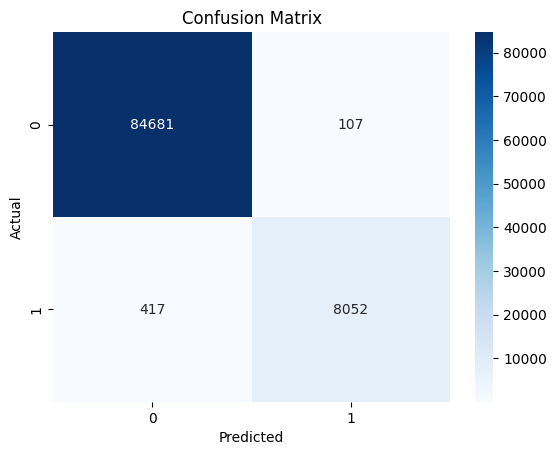

In [ ]:
conf_matrix = confusion_matrix(y_Test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Evaluation

**Precision untuk kelas 0 (pinjaman tidak macet) adalah 100%**, yang berarti dari semua prediksi yang diklasifikasikan sebagai tidak macet, semuanya benar.

**Precision untuk kelas 1 (pinjaman macet) adalah 99%**, yang berarti sebagian kecil prediksi yang diklasifikasikan sebagai macet ternyata salah.

**Recall untuk kelas 0 adalah 100%**, menunjukkan bahwa model dapat mengidentifikasi sebagian besar pinjaman yang sebenarnya tidak macet.

**Recall untuk kelas 1 adalah 95%**, yang menunjukkan bahwa model mampu mengidentifikasi sebagian besar pinjaman yang sebenarnya macet, namun ada sebagian kecil pinjaman yang macet yang tidak terdeteksi.

In [ ]:
print("Accuracy:", accuracy_score(y_Test, y_pred))
print("Classification Report:\n", classification_report(y_Test, y_pred))

Accuracy: 0.9943811188436257
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84788
           1       0.99      0.95      0.97      8469

    accuracy                           0.99     93257
   macro avg       0.99      0.97      0.98     93257
weighted avg       0.99      0.99      0.99     93257



## Cross Validation

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation score:", cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.97917583 0.98857995 0.97824292 0.95987433 0.98512712]
Mean cross-validation score: 0.9782000278799448
Standard deviation of cross-validation score: 0.009924844624460432


# Conculosion of Cross Validation

**Logistic Regression Without Scaling cros validation**

**Cross-validation scores:** [0.97917583, 0.98857995, 0.97824292, 0.95987433, 0.98512712]
**Mean cross-validation score:** 0.9782000278799448

**Standard deviation of cross-validation score:** 0.009924844624460432

**Logistic Regression With Scaling**

**Cross-validation scores:** [0.97917583, 0.98857995, 0.97824292, 0.95987433, 0.98512712]
**Mean cross-validation score:** 0.9782000278799448

**Standard deviation of cross-validation score:** 0.009924844624460432
Analisis dan Kesimpulan

**Kesamaan Hasil:**
Hasil cross-validation tanpa scaling dan dengan scaling menghasilkan skor yang identik, baik untuk setiap fold maupun untuk nilai rata-rata dan standar deviasinya.
Ini menunjukkan bahwa dalam konteks dataset ini dan model regresi logistik yang digunakan, scaling tidak memberikan perubahan yang signifikan terhadap performa model.
Akurasi Rata-rata:

Kedua pendekatan memiliki akurasi rata-rata yang sangat tinggi yaitu sekitar 0.9782, yang menunjukkan bahwa model dapat memprediksi dengan sangat baik.
Standar Deviasi:

Standar deviasi dari skor cross-validation juga cukup rendah (sekitar 0.0099), yang menunjukkan bahwa performa model cukup konsisten di seluruh fold cross-validation.
Evaluasi Kebutuhan Scaling:


#  K-Nearest Neighbors (KNN)

**Alasan Menggunakan KNN**

KNN adalah algoritma non-parametrik, yang berarti tidak ada asumsi yang dibuat tentang distribusi data. Ini membuatnya fleksibel dan dapat digunakan pada berbagai jenis data



In [ ]:

X = dataFIX.drop(columns=['loan_status', 'loan_status_bin'])
y = dataFIX['loan_status_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


Akurasi keseluruhan model adalah 91.1%. Ini berarti bahwa model berhasil memprediksi dengan benar 91.1% dari semua instance dalam dataset uji.
Meskipun akurasi ini terlihat tinggi, akurasi tidak selalu merupakan metrik terbaik untuk mengevaluasi model, terutama pada dataset yang tidak seimbang.

**Precision, Recall, dan F1-Score:**

**Untuk Kelas 0 (Tidak Gagal Bayar):**

Precision: 0.91, artinya 91% dari prediksi "Tidak Gagal Bayar" adalah benar.
Recall: 1.00, artinya model mendeteksi semua instance "Tidak Gagal Bayar" dengan benar.
F1-Score: 0.95, kombinasi dari precision dan recall yang menunjukkan keseimbangan antara keduanya.

**Untuk Kelas 1 (Gagal Bayar):**

Precision: 0.61, artinya hanya 61% dari prediksi "Gagal Bayar" adalah benar.
Recall: 0.07, artinya model hanya mendeteksi 7% dari semua instance "Gagal Bayar".
F1-Score: 0.12, kombinasi dari precision dan recall yang menunjukkan performa model yang kurang baik pada kelas ini.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9112774376186238
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     84788
           1       0.61      0.07      0.12      8469

    accuracy                           0.91     93257
   macro avg       0.76      0.53      0.54     93257
weighted avg       0.89      0.91      0.88     93257

Confusion Matrix:
[[84430   358]
 [ 7916   553]]


**True Negatives (TN):** Sel di kiri atas menunjukkan jumlah instance di mana model dengan benar memprediksi "No Default" (tidak gagal bayar). Ini adalah segmen terbesar, menunjukkan bahwa sebagian besar pinjaman yang tidak gagal bayar diidentifikasi dengan benar.

**False Positives (FP):** Sel di kanan atas menunjukkan jumlah instance di mana model salah memprediksi "Default" (gagal bayar) ketika sebenarnya "No Default". Segmen ini sangat kecil atau tidak ada.

**False Negatives (FN):**Sel di kiri bawah menunjukkan jumlah instance di mana model salah memprediksi "No Default" ketika sebenarnya "Default". Segmen ini lebih besar dibandingkan dengan FP.

**True Positives (TP):** Sel di kanan bawah menunjukkan jumlah instance di mana model dengan benar memprediksi "Default". Segmen ini relatif lebih kecil.

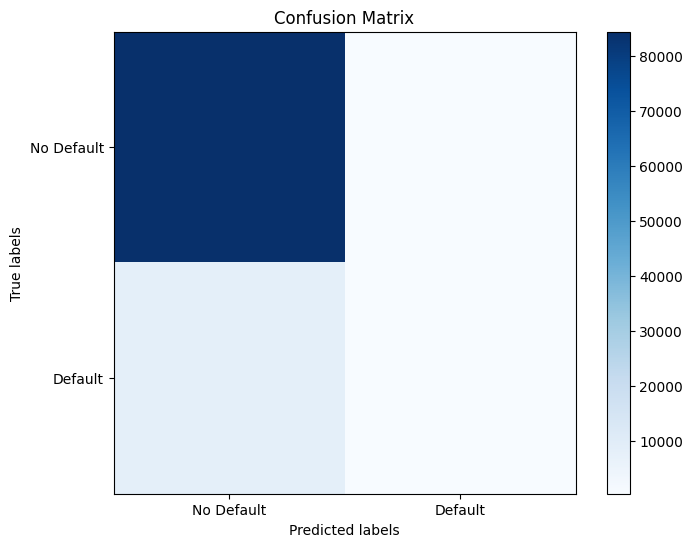

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.yticks([0, 1], ['No Default', 'Default'])
plt.show()

**Performansi Model Secara Keseluruhan:**
**bold text**
**Akurasi:** Model memiliki akurasi keseluruhan sebesar 91.13%. Ini menunjukkan bahwa model mampu memprediksi sebagian besar data dengan benar, tetapi akurasi saja tidak cukup untuk mengevaluasi performa model, terutama dalam konteks ketidakseimbangan kelas.

**Precision dan Recall:**
Untuk kelas 'No Default' (kelas 0): precision dan recall sangat tinggi, masing-masing sebesar 0.91 dan 1.00.
Untuk kelas 'Default' (kelas 1): precision adalah 0.61, tetapi recall sangat rendah pada 0.07. Hal ini menunjukkan bahwa model tidak cukup baik dalam mendeteksi kasus-kasus default.

**Ketidakseimbangan Kelas:**
Dari matriks kebingungan, kita dapat melihat bahwa model memiliki kesulitan dalam memprediksi kelas 'Default'. Hanya 553 dari 8469 kasus 'Default' yang diprediksi dengan benar. Sebaliknya, model sangat baik dalam memprediksi kelas 'No Default' dengan 84430 dari 84788 kasus diprediksi dengan benar.
Ketidakseimbangan ini menyebabkan model cenderung memprediksi sebagian besar data sebagai 'No Default', yang mengarah ke akurasi tinggi tetapi recall yang sangat rendah untuk kelas 'Default'.

**Grafik ROC dan AUC:**
ROC Curve: Garis ROC yang agak mendekati diagonal menunjukkan bahwa kemampuan model untuk membedakan antara kelas 'Default' dan 'No Default' tidak terlalu kuat.

**AUC (0.64):** Nilai AUC sebesar 0.64 menunjukkan bahwa model lebih baik dari tebakan acak (AUC 0.5), tetapi tidak optimal dalam membedakan kedua kelas. Ini menegaskan bahwa model memerlukan peningkatan lebih lanjut.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

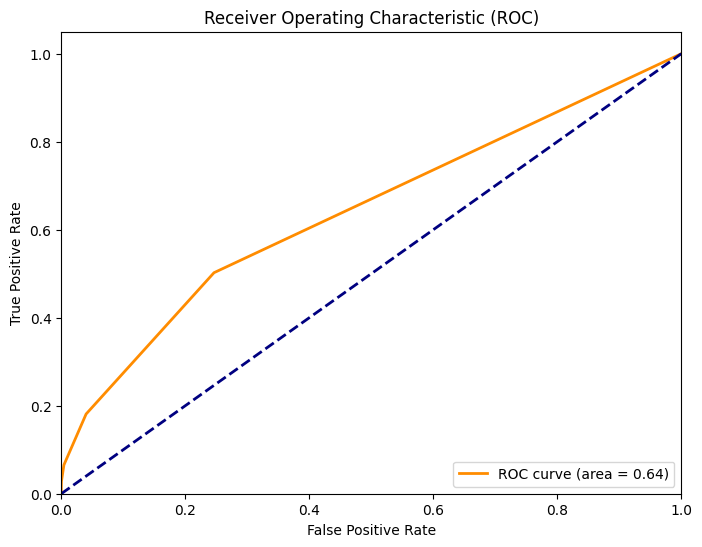

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Cross-validation scores: [0.72174743 0.51671188 0.20753402 0.66818577 0.90959392]
Mean cross-validation score: 0.6047546028716344
Standard deviation of cross-validation score: 0.2350206607323374


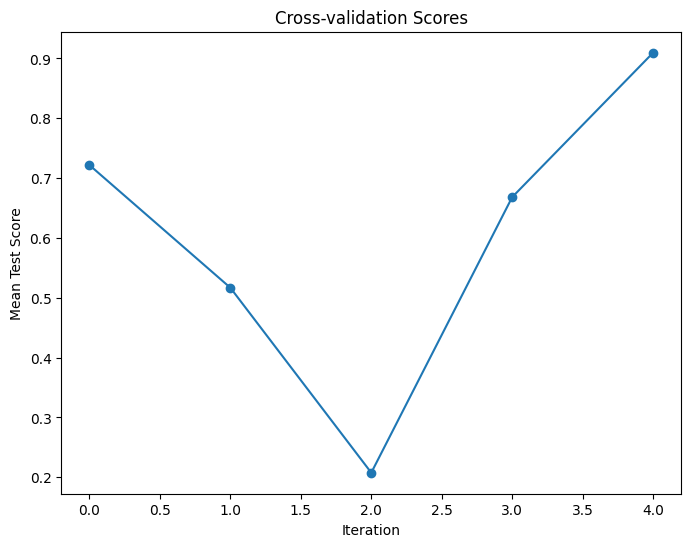

In [ ]:
# Cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation score:", np.std(cv_scores))

plt.figure(figsize=(8, 6))
plt.plot(range(len(cv_scores)), cv_scores, marker='o')
plt.title('Cross-validation Scores')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.show()
